In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import auc
from sklearn.metrics import roc_curve
from sklearn.metrics import precision_recall_curve
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.datasets import make_regression
from sklearn.datasets import make_classification
from sklearn.datasets import make_gaussian_quantiles

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import plot_roc_curve, plot_confusion_matrix, plot_precision_recall_curve

In [21]:
from sklearn.model_selection import GridSearchCV

In [2]:
from sklearn import svm

In [3]:
def Decision_Boundary(model, X, y, n_points, n_classes, colors, class_names):
    
    xmin, xmax = np.min(X[:,0]), np.max(X[:,0])
    ymin, ymax = np.min(X[:,1]), np.max(X[:,1])
    x_grid = np.linspace(xmin, xmax, n_points)
    y_grid = np.linspace(ymin, ymax, n_points)
    xy_grid_x, xy_grid_y = np.meshgrid(x_grid, y_grid)
    xy_grid = np.array([xy_grid_x.ravel(), xy_grid_y.ravel()]).T
    predict_labels = model.predict(xy_grid)
    labels = range(n_classes)
    tt = zip(colors, class_names, labels)
    
    plt.figure (figsize = (20,10))
    plt.contourf(xy_grid_x, xy_grid_y,  predict_labels.reshape(n_points,n_points), cmap = plt.cm.Paired, alpha = 0.5)
    for colors, class_names, labels in tt:
        idx = np.where(y == labels)
        plt.scatter(X[idx,0],X[idx,1], label = class_names, c = colors, s = 40, edgecolor = 'k',cmap = plt.cm.copper)
    plt.legend()
    plt.xlim(xmin-1, xmax+1)
    plt.ylim(ymin-1, ymax+1)
    plt.show()

# Classification - Decision Boundaries

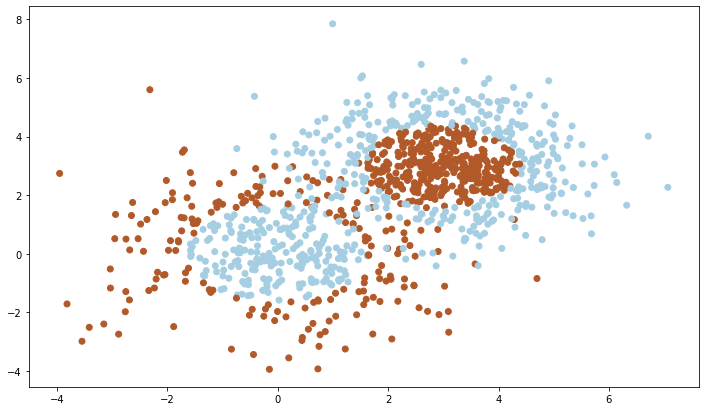

In [4]:
X1, y1 = make_gaussian_quantiles(cov = 2, n_samples=400, n_features=2, n_classes = 2, random_state=1)
X2, y2 = make_gaussian_quantiles(mean=(3, 3), cov=1.5, n_samples=700, n_features=2, n_classes=2, random_state=1)   

X = np.concatenate((X1, X2))
y = np.concatenate((y1, -y2 + 1))

plt.figure(figsize = (12,7))
plt.scatter(X[:,0], X[:,1], c = y, cmap = plt.cm.Paired)
plt.show()

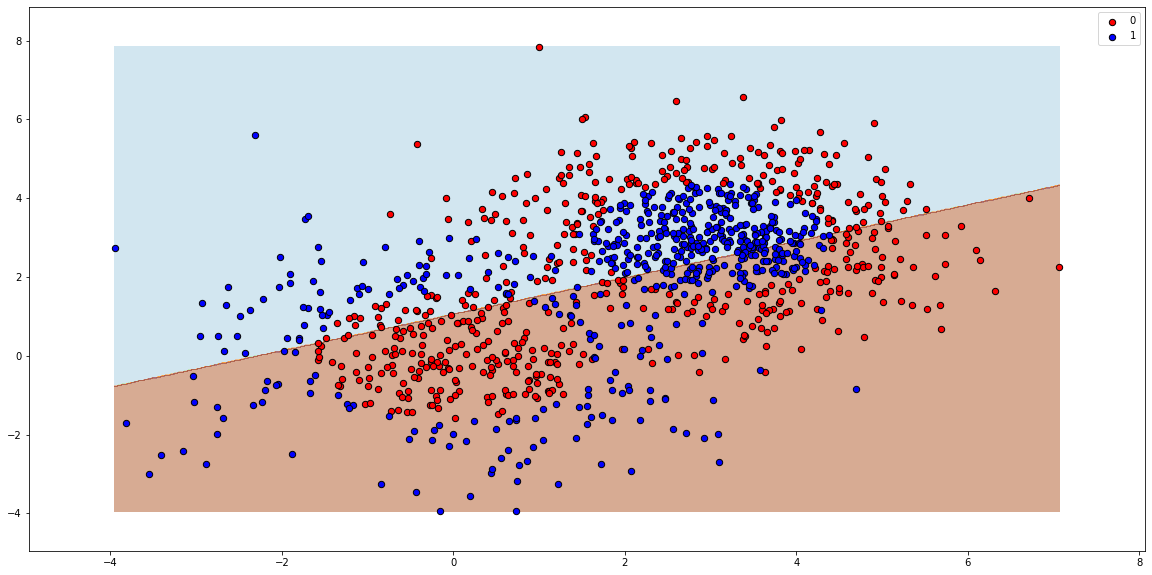

In [5]:
mod_svm_lin = svm.LinearSVC(max_iter = 100000)
mod_svm_lin.fit(X,y)

colors = 'rb'
class_names = '01'
Decision_Boundary(mod_svm_lin,X,y,n_points=500, n_classes=2, colors = colors, class_names = class_names)

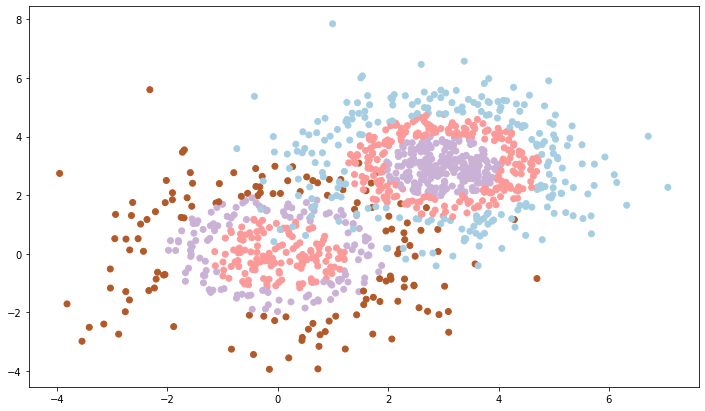

In [23]:
X1, y1 = make_gaussian_quantiles(cov = 2, n_samples=400, n_features=2, n_classes = 3, random_state=1)
X2, y2 = make_gaussian_quantiles(mean=(3, 3), cov=1.5, n_samples=700, n_features=2, n_classes=3, random_state=1)   

X = np.concatenate((X1, X2))
y = np.concatenate((y1, -y2 + 1))
y = y + 1
plt.figure(figsize = (12,7))
plt.scatter(X[:,0], X[:,1], c = y, cmap = plt.cm.Paired)
plt.show()

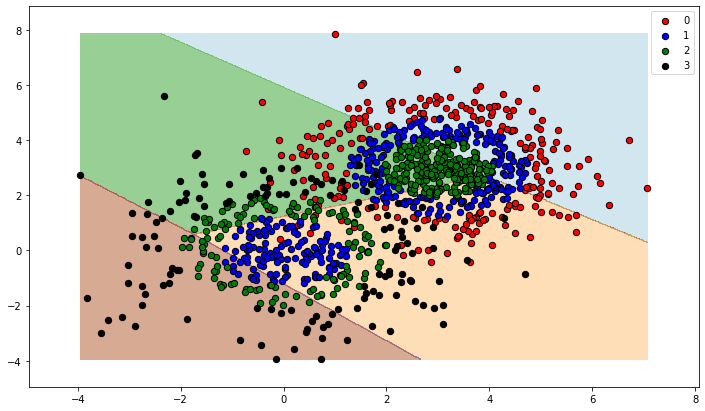

In [24]:
mod_svm_lin = svm.LinearSVC(max_iter = 100000)
mod_svm_lin.fit(X,y)

classes = 4 
colors = 'rbgk'
class_names = '0123'
Decision_Boundary(mod_svm_lin,X,y,n_points=500, n_classes = classes, colors = colors, class_names = class_names)

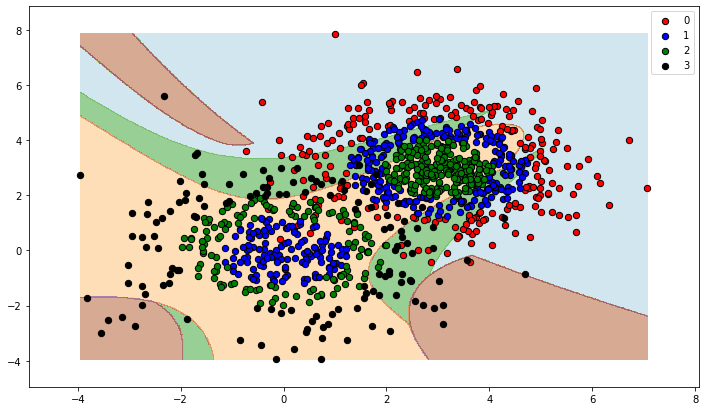

In [25]:
mod_svm_poly = svm.SVC(kernel = "poly")
mod_svm_poly.fit(X,y)

classes = 4 
colors = 'rbgk'
class_names = '0123'
Decision_Boundary(mod_svm_poly,X,y,n_points=500, n_classes = classes, colors = colors, class_names = class_names)

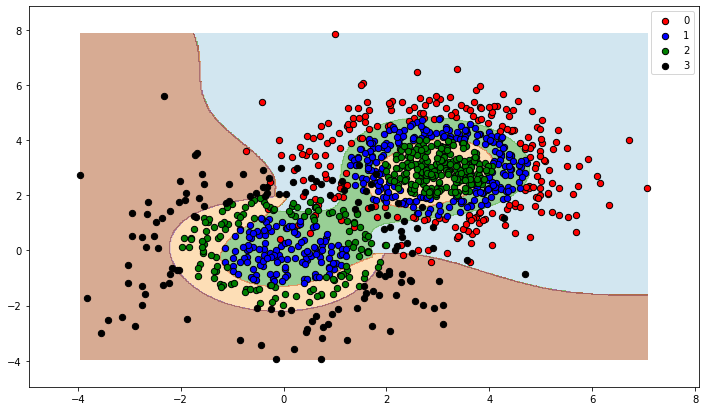

In [27]:
mod_svm_radial = svm.SVC(kernel = "rbf")
mod_svm_radial.fit(X,y)

classes = 4 
colors = 'rbgk'
class_names = '0123'
Decision_Boundary(mod_svm_radial,X,y,n_points=500, n_classes = classes, colors = colors, class_names = class_names)

In [29]:
y_predict = mod_svm_radial.predict(X)
print(classification_report(y,y_predict))

              precision    recall  f1-score   support

           0       0.84      0.85      0.84       234
           1       0.81      0.88      0.84       366
           2       0.85      0.86      0.86       366
           3       0.94      0.67      0.78       134

    accuracy                           0.84      1100
   macro avg       0.86      0.82      0.83      1100
weighted avg       0.85      0.84      0.84      1100



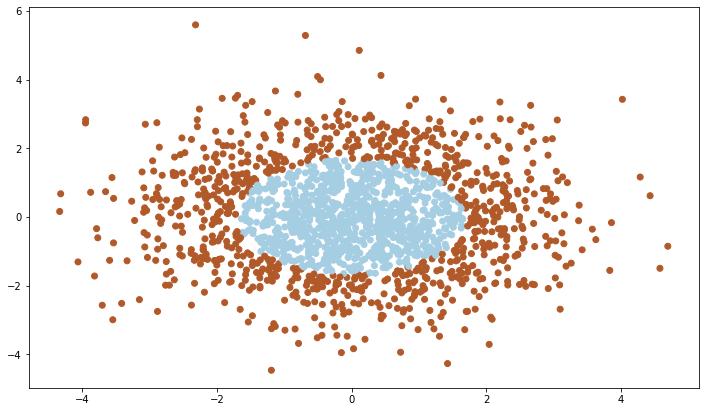

In [35]:
X, y = make_gaussian_quantiles(cov = 2, n_samples = 1800, n_features=2, n_classes = 2, random_state=1)

plt.figure(figsize = (12,7))
plt.scatter(X[:,0], X[:,1], c = y, cmap = plt.cm.Paired)
plt.show()

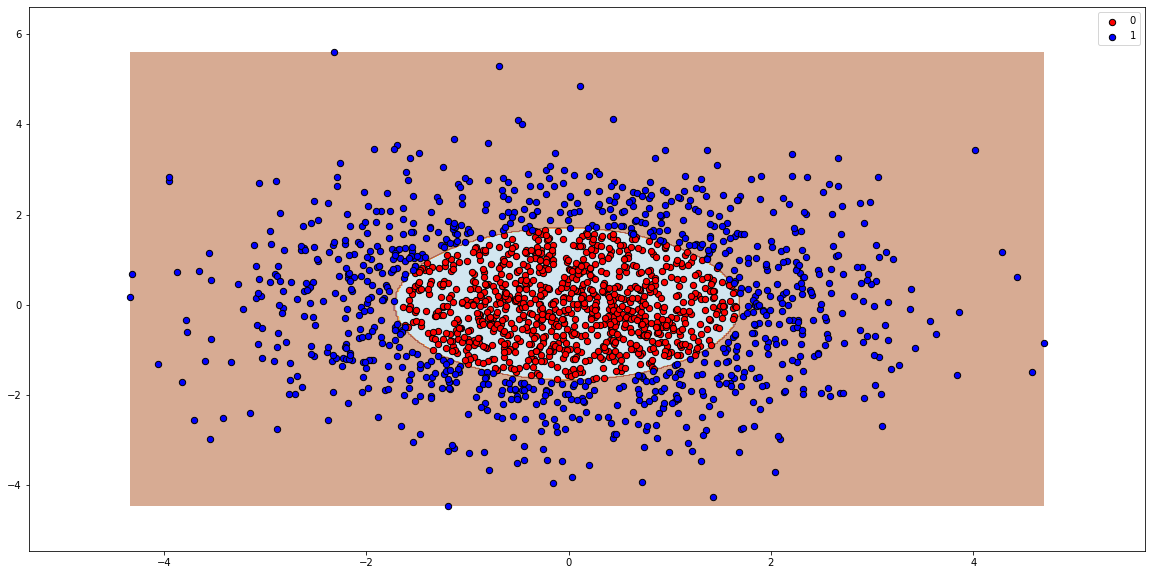

In [40]:
mod_svm_radial = svm.SVC(kernel = "rbf")
mod_svm_radial.fit(X,y)

classes = 2
colors = 'rb'
class_names = '01'
Decision_Boundary(mod_svm_radial,X,y, n_points=500, n_classes = classes, colors = colors, class_names = class_names)

In [41]:
y_predict = mod_svm_radial.predict(X)
print(classification_report(y,y_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       900
           1       1.00      1.00      1.00       900

    accuracy                           1.00      1800
   macro avg       1.00      1.00      1.00      1800
weighted avg       1.00      1.00      1.00      1800



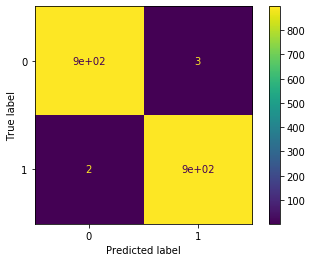

In [42]:
plot_confusion_matrix(mod_svm_radial,X,y)

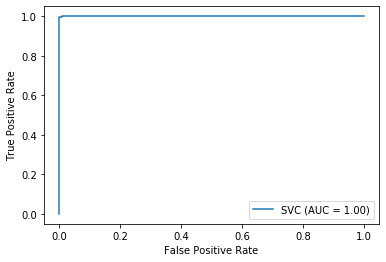

In [43]:
plot_roc_curve(mod_svm_radial,X,y)

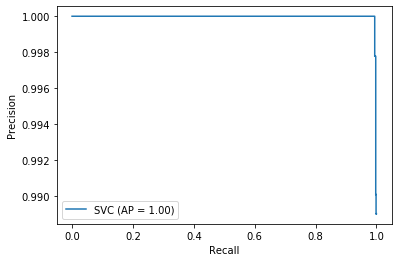

In [44]:
plot_precision_recall_curve(mod_svm_radial,X,y)

In [45]:
twoclass_output = mod_svm_radial.decision_function(X)
twoclass_output

array([-1.91998817, -1.49854375, -0.15018478, ...,  3.56922171,
        1.73226614, -3.36552039])

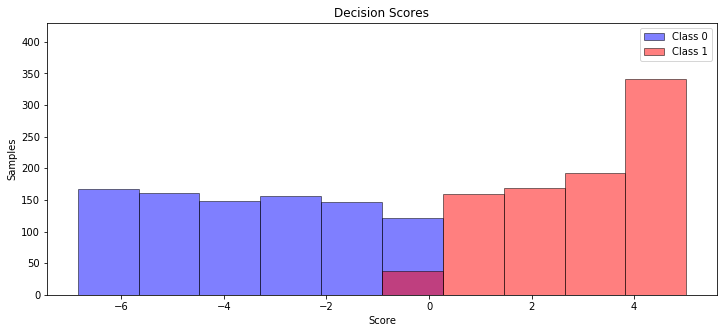

In [47]:
plot_colors = "br"
class_names = "01"

plot_range = (twoclass_output.min(), twoclass_output.max())

plt.figure(figsize = (12,5))
for label, cl, color in zip(range(2), class_names, plot_colors):
    plt.hist(twoclass_output[y == label], bins = 10, range = plot_range,
             facecolor = color, label = 'Class %s' % cl, alpha=.5, edgecolor='k')
x1, x2, y1, y2 = plt.axis()
plt.axis((x1, x2, y1, y2 * 1.2))
plt.legend(loc='upper right')
plt.ylabel('Samples')
plt.xlabel('Score')
plt.title('Decision Scores')
plt.show()

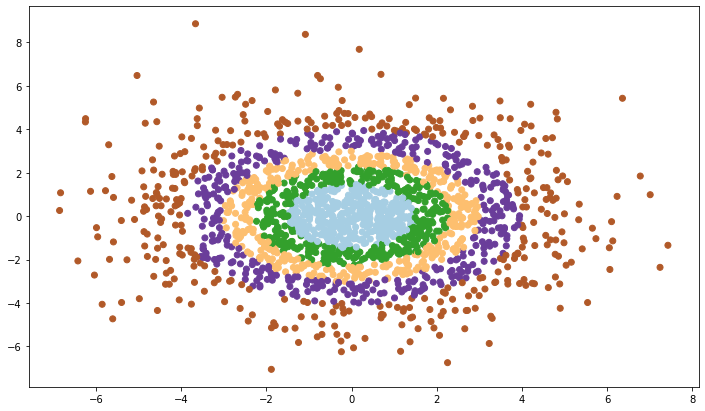

In [12]:
X1, y1 = make_gaussian_quantiles(cov = 5, n_samples = 2000, n_features = 2, n_classes = 5, random_state=1)
plt.figure(figsize = (12,7))
plt.scatter(X1[:,0], X1[:,1], c = y1, cmap = plt.cm.Paired)
plt.show()

In [55]:
gamma_grid = np.linspace(0.0001, 1, 100)
mod_svm_radial = svm.SVC(kernel = "rbf")
model_optimal = GridSearchCV(mod_svm_radial, param_grid = {'gamma':gamma_grid})
model_optimal.fit(X1,y1)

GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'gamma': array([1.000e-04, 1.020e-02, 2.0...
       7.273e-01, 7.374e-01, 7.475e-01, 7.576e-01, 7.677e-01, 7.778e-01,
       7.879e-01, 7.980e-01, 8.081e-01, 8.182e-01, 8.283e-01, 8.384e-01,
       8.485e-01, 8.586e-01, 8.687e-01, 8.788e-01, 8.889e-01, 8.990e-01,
       9.091e-01, 9.192e-01, 9.293e-01, 9.394e-01, 9.495e-01, 9.596e-01,
       9.697e-01, 9.798e-01, 9.899e-01, 1.000e+00])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, v

In [56]:
model_optimal.best_estimator_

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.0506, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [57]:
model_optimal.best_params_

{'gamma': 0.0506}

In [58]:
y1_predict = model_optimal.best_estimator_.predict(X1)
print(accuracy_score(y1, y1_predict))

0.9655


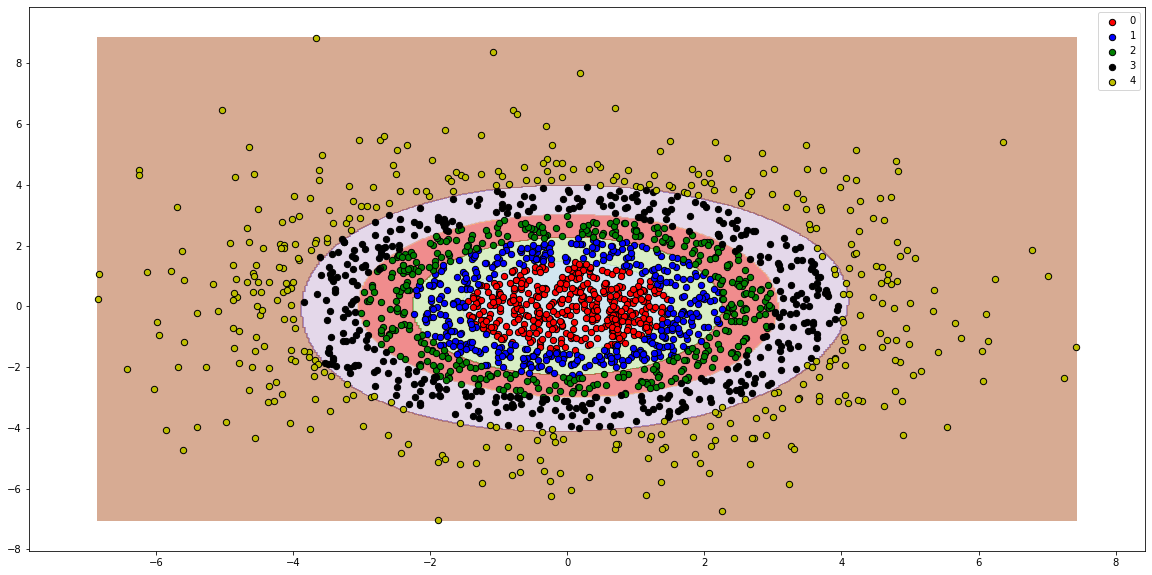

In [59]:
classes = 5
colors = 'rbgky'
class_names = '01234'
Decision_Boundary(model_optimal.best_estimator_,X1,y1, n_points=500, n_classes = classes, colors = colors, class_names = class_names)

In [94]:
X_multi, y_multi = make_gaussian_quantiles(cov = 5, n_features = 12, 
                                           n_samples = 2000, n_classes = 5, random_state = 1)
gamma_grid = np.linspace(0.0001, 1, 100)
mod_svm_radial = svm.SVC(kernel = "rbf")
model_optimal = GridSearchCV(mod_svm_radial, param_grid = {'gamma':gamma_grid}, cv = 10)
model_optimal.fit(X_multi,y_multi)

GridSearchCV(cv=10, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'gamma': array([1.000e-04, 1.020e-02, 2.030...
       7.273e-01, 7.374e-01, 7.475e-01, 7.576e-01, 7.677e-01, 7.778e-01,
       7.879e-01, 7.980e-01, 8.081e-01, 8.182e-01, 8.283e-01, 8.384e-01,
       8.485e-01, 8.586e-01, 8.687e-01, 8.788e-01, 8.889e-01, 8.990e-01,
       9.091e-01, 9.192e-01, 9.293e-01, 9.394e-01, 9.495e-01, 9.596e-01,
       9.697e-01, 9.798e-01, 9.899e-01, 1.000e+00])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, v

In [97]:
model_optimal.best_params_

{'gamma': 0.010199999999999999}

In [98]:
y_multi_predict = model_optimal.best_estimator_.predict(X_multi)
print(accuracy_score(y_multi, y_multi_predict))

0.939


# Regression

In [81]:
X2, y2 = make_regression(n_samples = 2000)
d_grid = np.array([1,2,3,4])
C_grid = np.linspace(0.1, 100, 10)
mod_svm_radial = svm.SVR(kernel = "poly")
model_optimal = GridSearchCV(mod_svm_radial, param_grid = {'degree': d_grid, 'C': C_grid})
model_optimal.fit(X2,y2)

GridSearchCV(cv=None, error_score=nan,
             estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                           epsilon=0.1, gamma='scale', kernel='poly',
                           max_iter=-1, shrinking=True, tol=0.001,
                           verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': array([  0.1,  11.2,  22.3,  33.4,  44.5,  55.6,  66.7,  77.8,  88.9,
       100. ]),
                         'degree': array([1, 2, 3, 4])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [82]:
model_optimal.best_estimator_

SVR(C=100.0, cache_size=200, coef0=0.0, degree=1, epsilon=0.1, gamma='scale',
    kernel='poly', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [83]:
model_optimal.best_params_

{'C': 100.0, 'degree': 1}

In [84]:
model_optimal.best_estimator_.score(X2,y2)

0.9999998329356599

In [85]:
y2_predict = model_optimal.best_estimator_.predict(X2)
np.sqrt(np.mean((y2_predict - y2)**2))

0.04980268108898869

In [86]:
np.mean(y2)

0.40176300282269745